# Employee Attrition Analysis
#### By Anjali Gautam (M13472138) and Hasnat Tahir (M13243650)



Problem Statement:

A large company employs around 4000 employees. Every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management has contracted an HR analytics firm to understand what factors they should focus on in order to curb attrition.

In this project we will analyse the datasets and build various models to best capture employee attrition. 

### 1. Data Import & Data Munging

In [2]:
import os
os.chdir("D:\\University\\Pet projects\\HR\\hr-analytics-case-study")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import Required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# Setting Display options 
pd.options.display.max_columns = None

Multiple datasets have been provided to aid the analysis 

- General data (of Employees) 
- Employee Survey Data 
- Manager Survey Data
- in_time data 
- out_time data 

In [6]:
# Reading in the Files
general_data = pd.read_csv("general_data.csv")
employee_survey_data = pd.read_csv("employee_survey_data.csv")
manager_survey_data = pd.read_csv("manager_survey_data.csv")
in_time = pd.read_csv("in_time.csv")
out_time = pd.read_csv("out_time.csv")

In [7]:
# Checking the Shape of the datsets 
general_data.shape, employee_survey_data.shape, manager_survey_data.shape, in_time.shape, out_time.shape

((4410, 24), (4410, 4), (4410, 3), (4410, 262), (4410, 262))

From the Shape of all the datasets, we observe data is provided to us for 4,410 Employees. To further confirm this we will check the uniqueness of the general employee dataset. 

#### *General Data*

In [8]:
general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4

In [9]:
general_data.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4401.000000   
mean             8.0          0.793878          11.279936   
std              0.0          0.851883           7.782222   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  
count           4410.000000  
mean               4.123129  
std                3.567327  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000

In [10]:
general_data['EmployeeID'].nunique()

4410

In [11]:
# Checking the Structure of the data 
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [12]:
general_data["Attrition"].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

Out of 4,410 employees 711 have left the company

#### *Employee Survey Data*

In [13]:
employee_survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

In [14]:
employee_survey_data["EmployeeID"].nunique()

4410

Survey data is also unique at employee ID level

#### *Manager Survey Data*

In [15]:
manager_survey_data.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

In [16]:
manager_survey_data["EmployeeID"].nunique()

4410

#### *In Time data*

In [17]:
in_time.head(3)

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06         NaN   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29         NaN   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26         NaN   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 10:01:24  2015-01-16 10:19:08                  NaN   
1  2015-01-15 09:37:57  2015-01-16 09:57:18  2015-01-19 10:23:43   
2  2015-01-15 09:55:11  2015-01-16 10:05:36  2015-01-19 09:47:53   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 09:50:34  2015-01-21 09:49:42  2015-01-22 09:47:45   
1  2015-01-20 09:29:03  2015-01-21 09:46:45  2015-01-22 10:03:51   
2  2015-01-20 09:57:09  2015-01-21 10:29:40  2015-01-22 09:59:11   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 09:23:44         NaN  2015-01-27 09:50:37  2015-01-28 09:56:13   
1  2015-01-23 09:20:06         NaN  2015-01-27 10:07:48  2015-01-28 10:08:25   
2  2015-01-23 10:16:34         NaN  2015-01-27 10:07:30  2015-01-28 10:05:43   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 09:53:47  2015-01-30 10:09:26  2015-02-02 09:38:43   
1  2015-01-29 09:52:04  2015-01-30 09:49:49  2015-02-02 10:07:26   
2  2015-01-29 10:06:48  2015-01-30 10:14:36  2015-02-02 09:54:45   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 10:23:38  2015-02-04 09:48:37  2015-02-05 09:52:36   
1  2015-02-03 09:55:45  2015-02-04 10:25:41  2015-02-05 10:05:11   
2  2015-02-03 09:27:11  2015-02-04 10:04:03  2015-02-05 10:08:11   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 09:53:23  2015-02-09 10:01:45  2015-02-10 10:14:18   
1  2015-02-06 09:12:39                  NaN  2015-02-10 10:10:13   
2  2015-02-06 10:23:51  2015-02-09 10:08:43  2015-02-10 10:26:18   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 10:18:44  2015-02-12 10:10:35  2015-02-13 09:13:07   
1  2015-02-11 09:40:20  2015-02-12 10:10:09  2015-02-13 09:35:25   
2  2015-02-11 10:02:13  2015-02-12 09:55:10  2015-02-13 10:32:34   

            2015-02-16           2015-02-17           2015-02-18  \
0  2015-02-16 10:14:02  2015-02-17 10:03:08  2015-02-18 10:23:06   
1  2015-02-16 10:04:12  2015-02-17 09:45:05  2015-02-18 09:54:42   
2  2015-02-16 10:18:43  2015-02-17 10:04:54  2015-02-18 10:16:19   

            2015-02-19           2015-02-20           2015-02-23  \
0                  NaN  2015-02-20 09:54:56  2015-02-23 09:46:59   
1  2015-02-19 10:11:49  2015-02-20 10:06:18  2015-02-23 09:41:58   
2  2015-02-19 09:47:19  2015-02-20 10:20:51  2015-02-23 10:14:02   

            2015-02-24           2015-02-25           2015-02-26  \
0  2015-02-24 10:11:18  2015-02-25 09:52:36  2015-02-26 09:56:33   
1  2015-02-24 09:44:22  2015-02-25 09:58:39  2015-02-26 09:59:07   
2  2015-02-24 10:23:28  2015-02-25 09:59:06  2015-02-26 10:01:22   

            2015-02-27           2015-03-02           2015-03-03  \
0  2015-02-27 09:58:46  2015-03-02 10:19:43  2015-03-03 10:08:37   
1  2015-02-27 10:31:41  2015-03-02 09:55:43  2015-03-03 10:31:20   
2  2015-02-27 09:57:26  2015-03-02 10:02:38  2015-03-03 10:07:45   

            2015-03-04  2015-03-05           2015-03-06           2015-03

The data contains in time for all the employees on various days. There are 262 columns so we only have data for 261 days i.e. excluding weekends 

In [18]:
in_time.shape

(4410, 262)

From the head of the data we observe NA values

In [19]:
na_values = pd.DataFrame(in_time.isna().sum(), columns=['# NA values'])
na_values.head()

# NA values
Unnamed: 0            0
2015-01-01         4410
2015-01-02          209
2015-01-05          206
2015-01-06          228

In [20]:
na_values[na_values['# NA values'] == 4410]

# NA values
2015-01-01         4410
2015-01-14         4410
2015-01-26         4410
2015-03-05         4410
2015-05-01         4410
2015-07-17         4410
2015-09-17         4410
2015-10-02         4410
2015-11-09         4410
2015-11-10         4410
2015-11-11         4410
2015-12-25         4410

In [21]:
na_values[na_values['# NA values'] != 4410]['# NA values'].mean()

224.64

- No data is available for any employees on specific dates; on further observation, these dates are Indian public holidays.
- On an average 225 employees are absent or have a week-off an a particular day 

#### *Out time data*

In [22]:
out_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58         NaN   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13         NaN   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25         NaN   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45         NaN   
4  2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58         NaN   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 17:22:13  2015-01-16 17:35:11                  NaN   
1  2015-01-15 17:14:44  2015-01-16 17:40:57  2015-01-19 17:58:22   
2  2015-01-15 17:21:29  2015-01-16 17:18:13  2015-01-19 16:52:13   
3  2015-01-15 16:53:26  2015-01-16 16:52:34  2015-01-19 16:14:18   
4  2015-01-15 18:21:48  2015-01-16 18:28:03                  NaN   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 16:37:07  2015-01-21 16:55:24  2015-01-22 16:50:47   
1  2015-01-20 17:05:13  2015-01-21 17:41:05  2015-01-22 17:26:26   
2  2015-01-20 16:52:23  2015-01-21 17:17:50  2015-01-22 17:27:54   
3  2015-01-20 17:39:50  2015-01-21 16:46:51  2015-01-22 16:51:48   
4  2015-01-20 17:59:24  2015-01-21 18:41:38  2015-01-22 18:27:37   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 17:00:01         NaN  2015-01-27 17:28:22  2015-01-28 17:03:21   
1  2015-01-23 17:06:50         NaN  2015-01-27 17:35:50  2015-01-28 17:19:48   
2  2015-01-23 17:11:52         NaN  2015-01-27 17:22:27  2015-01-28 16:24:04   
3  2015-01-23 17:05:41         NaN  2015-01-27 17:03:48  2015-01-28 17:33:22   
4  2015-01-23 16:53:11         NaN  2015-01-27 17:52:43  2015-01-28 17:40:46   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 17:18:36  2015-01-30 17:00:25  2015-02-02 16:32:49   
1  2015-01-29 17:07:38  2015-01-30 16:53:22  2015-02-02 17:45:18   
2  2015-01-29 17:20:07  2015-01-30 17:16:03  2015-02-02 16:59:01   
3  2015-01-29 16:44:01  2015-01-30 17:09:42  2015-02-02 17:18:12   
4  2015-01-29 18:16:26  2015-01-30 18:26:33  2015-02-02 17:53:21   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 17:35:49  2015-02-04 17:24:56  2015-02-05 17:26:31   
1  2015-02-03 17:33:42  2015-02-04 18:04:20  2015-02-05 17:43:25   
2  2015-02-03 15:58:24  2015-02-04 17:25:54  2015-02-05 16:29:41   
3  2015-02-03 17:27:41  2015-02-04 17:30:22  2015-02-05 17:11:44   
4  2015-02-03 17:57:43  2015-02-04 18:03:13  2015-02-05 18:07:43   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 17:21:35  2015-02-09 17:37:50  2015-02-10 17:30:20   
1  2015-02-06 17:06:42                  NaN  2015-02-10 18:12:17   
2  2015-02-06 17:18:15  2015-02-09 16:48:18  2015-02-10 17:15:49   
3  2015-02-06 16:33:04  2015-02-09 17:16:29                  NaN   
4  2015-02-06 17:38:14  2015-02-09 18:26:28  2015-02-10 17:24:32   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 17:30:19  2015-02-12 17:36:42  2015-02-13 16:25:26   
1  2015-02-11 17:18:36  

In [23]:
na_values_outtime = pd.DataFrame(out_time.isna().sum(), columns=['# NA values'])
na_values_outtime.head()

# NA values
Unnamed: 0            0
2015-01-01         4410
2015-01-02          209
2015-01-05          206
2015-01-06          228

In [24]:
na_values_outtime[na_values_outtime['# NA values'] == 4410]

# NA values
2015-01-01         4410
2015-01-14         4410
2015-01-26         4410
2015-03-05         4410
2015-05-01         4410
2015-07-17         4410
2015-09-17         4410
2015-10-02         4410
2015-11-09         4410
2015-11-10         4410
2015-11-11         4410
2015-12-25         4410

In [25]:
na_values_outtime[na_values_outtime['# NA values'] != 4410]['# NA values'].mean()

224.64

Both the datasets have NA values at same locations 

In [26]:
out_time.columns

Index(['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)

In order to get In and out time at Employee and date level we will reshape the data such that dates are in rows and not columns 

#### *Reshaping time Data*

In [27]:
# In time data
melted_time = in_time.melt(id_vars = "Unnamed: 0",
                              value_vars = list(in_time.columns).remove("Unnamed: 0"),
                              var_name = "Date", value_name = "Time")

In [28]:
melted_time.head()

Unnamed: 0        Date Time
0           1  2015-01-01  NaN
1           2  2015-01-01  NaN
2           3  2015-01-01  NaN
3           4  2015-01-01  NaN
4           5  2015-01-01  NaN

In [29]:
# Out time data
melted_time_out = out_time.melt(id_vars = "Unnamed: 0",
                              value_vars = list(out_time.columns).remove("Unnamed: 0"),
                              var_name = "Date", value_name = "out_time")

In [30]:
melted_time_out.head()

Unnamed: 0        Date out_time
0           1  2015-01-01      NaN
1           2  2015-01-01      NaN
2           3  2015-01-01      NaN
3           4  2015-01-01      NaN
4           5  2015-01-01      NaN

We will merge the two time datasets in order to calculate time spend by each employee in office 

In [31]:
# Merge in and out time data
master_time = pd.merge(melted_time,
                      melted_time_out,
                      on = ["Unnamed: 0", "Date"],
                      how = "inner")

In [32]:
master_time.shape

(1151010, 4)

In [33]:
master_time.columns

Index(['Unnamed: 0', 'Date', 'Time', 'out_time'], dtype='object')

To be able to take time differences we will convert time columns in the datetime format

In [34]:
master_time['in_time_0'] = pd.to_datetime(master_time['Time'])
master_time['out_time_0'] = pd.to_datetime(master_time['out_time'])

In [35]:
# drop NA values 
master_time1 = master_time.dropna()
master_time1.shape

(1041930, 6)

Calculating **total time** spent by an employee in office on each day it was present 

In [36]:
#master_time1['total_time'] = ((master_time1['out_time_0'] - master_time1['in_time_0'])/np.timedelta64(1,'h'))

In [37]:
### 
def time_diff(row):
    return ((row['out_time_0']-row['in_time_0'])/np.timedelta64(1,'h'))

master_time1['total_time'] = master_time1.apply(time_diff, axis=1)

In [38]:
master_time1.head()

Unnamed: 0        Date                 Time             out_time  \
4410           1  2015-01-02  2015-01-02 09:43:45  2015-01-02 16:56:15   
4411           2  2015-01-02  2015-01-02 10:15:44  2015-01-02 18:22:17   
4412           3  2015-01-02  2015-01-02 10:17:41  2015-01-02 16:59:14   
4413           4  2015-01-02  2015-01-02 10:05:06  2015-01-02 17:25:24   
4414           5  2015-01-02  2015-01-02 10:28:17  2015-01-02 18:31:37   

               in_time_0          out_time_0  total_time  
4410 2015-01-02 09:43:45 2015-01-02 16:56:15    7.208333  
4411 2015-01-02 10:15:44 2015-01-02 18:22:17    8.109167  
4412 2015-01-02 10:17:41 2015-01-02 16:59:14    6.692500  
4413 2015-01-02 10:05:06 2015-01-02 17:25:24    7.338333  
4414 2015-01-02 10:28:17 2015-01-02 18:31:37    8.055556

Rename column **Unnamed: 0** to Employee ID

In [39]:
master_time1.rename(columns = {"Unnamed: 0": "EmployeeID"}, inplace = True)

Keeping just the above created field and aggregating the data on employee level to get mean time spent in the office

In [40]:
master_time_final = master_time1[['EmployeeID', 'total_time']]
master_time_final.head()

EmployeeID  total_time
4410           1    7.208333
4411           2    8.109167
4412           3    6.692500
4413           4    7.338333
4414           5    8.055556

In [41]:
master_time_final = master_time_final.groupby('EmployeeID', as_index= False).agg({"total_time": "mean"})

In [42]:
master_time_final.shape

(4410, 2)

In [43]:
master_time_final.head()

EmployeeID  total_time
0           1    7.373651
1           2    7.718969
2           3    7.013240
3           4    7.193678
4           5    8.006175

Merging all the datasets to the get a master dataset for further analysis and modeling

In [44]:
master_data = pd.merge(pd.merge(pd.merge(general_data, master_time_final,
                      on = "EmployeeID",
                      how = "inner"),manager_survey_data,
                          on = "EmployeeID",
                          how = "inner"),employee_survey_data,
                            on = "EmployeeID",
                            how = "inner")                        

Converting our response variable **Attrition** to binary 

In [45]:
master_data['Attrition'] = master_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [46]:
#master_data['Attrition'] = np.where(master_data['Attrition'] == 'Yes', 1,0)

In [47]:
master_data.head()

Age  Attrition     BusinessTravel              Department  \
0   51          0      Travel_Rarely                   Sales   
1   31          1  Travel_Frequently  Research & Development   
2   32          0  Travel_Frequently  Research & Development   
3   38          0         Non-Travel  Research & Development   
4   32          0      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                 6          2  Life Sciences              1           1   
1                10          1  Life Sciences              1           2   
2                17          4          Other              1           3   
3                 2          5  Life Sciences              1           4   
4                10          1        Medical              1           5   

   Gender  JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0  Female         1  Healthcare Representative       Married         131160   
1  Female         1         Research Scientist        Single          41890   
2    Male         4            Sales Executive       Married         193280   
3    Male         3            Human Resources       Married          83210   
4    Male         1            Sales Executive        Single          23420   

   NumCompaniesWorked Over18  PercentSalaryHike  StandardHours  \
0                 1.0      Y                 11              8   
1                 0.0      Y                 23              8   
2                 1.0      Y                 15              8   
3                 3.0      Y                 11              8   
4                 4.0      Y                 12              8   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0                1.0                      6               1   
1                 1                6.0                      3               5   
2                 3                5.0                      2               5   
3                 3               13.0                      5               8   
4                 2                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  total_time  JobInvolvement  \
0                        0                     0    7.373651               3   
1                        1                     4    7.718969               2   
2                        0                     3    7.013240               3   
3                        7                     5    7.193678               2   
4                        0                     4    8.006175               3   

   PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
0                  3                      3.0              4.0   
1                  4                      3.0              2.0   
2                  3                      2.0              2.0   
3                  3                      4.0              4.0   
4                  3                      4.0              1.0   

   WorkLifeBalance  
0              2.0  
1              4.0  
2              1.0  
3              3.0  
4              3.0

In [48]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null int64
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-nu

Checking for missing values in the combined dataset

In [49]:
master_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
total_time                  0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

We observe NA values in variables below 
- NumCompaniesWorked     
- TotalWorkingYears           
- EnvironmentSatisfaction    
- JobSatisfaction            
- WorkLifeBalance  

We will impute all these values with their median except for vaiable **NumCompaniesWorked** which will be imputed with a value of 1 as we are sure an employee has worked in atleast one company (i.e. current company)

In [50]:
# Imputing the data and checking for NAs again
master_data.EnvironmentSatisfaction = master_data.EnvironmentSatisfaction.fillna(master_data.EnvironmentSatisfaction.median())
master_data.JobSatisfaction = master_data.JobSatisfaction.fillna(master_data.JobSatisfaction.median())
master_data.WorkLifeBalance = master_data.WorkLifeBalance.fillna(master_data.WorkLifeBalance.median())
master_data.TotalWorkingYears = master_data.TotalWorkingYears.fillna(master_data.TotalWorkingYears.median())
master_data.NumCompaniesWorked = master_data.NumCompaniesWorked.fillna(1)

master_data.isna().sum() #check

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
total_time                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

### 2. Exploratory Data Analysis

In [51]:
master_data.describe()

Age    Attrition  DistanceFromHome    Education  EmployeeCount  \
count  4410.000000  4410.000000       4410.000000  4410.000000         4410.0   
mean     36.923810     0.161224          9.192517     2.912925            1.0   
std       9.133301     0.367780          8.105026     1.023933            0.0   
min      18.000000     0.000000          1.000000     1.000000            1.0   
25%      30.000000     0.000000          2.000000     2.000000            1.0   
50%      36.000000     0.000000          7.000000     3.000000            1.0   
75%      43.000000     0.000000         14.000000     4.000000            1.0   
max      60.000000     1.000000         29.000000     5.000000            1.0   

        EmployeeID     JobLevel  MonthlyIncome  NumCompaniesWorked  \
count  4410.000000  4410.000000    4410.000000         4410.000000   
mean   2205.500000     2.063946   65029.312925            2.687528   
std    1273.201673     1.106689   47068.888559            2.495967   
min       1.000000     1.000000   10090.000000            0.000000   
25%    1103.250000     1.000000   29110.000000            1.000000   
50%    2205.500000     2.000000   49190.000000            2.000000   
75%    3307.750000     3.000000   83800.000000            4.000000   
max    4410.000000     5.000000  199990.000000            9.000000   

       PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  \
count        4410.000000         4410.0       4410.000000        4410.000000   
mean           15.209524            8.0          0.793878          11.277324   
std             3.659108            0.0          0.851883           7.774490   
min            11.000000            8.0          0.000000           0.000000   
25%            12.000000            8.0          0.000000           6.000000   
50%            14.000000            8.0          1.000000          10.000000   
75%            18.000000            8.0          1.000000          15.000000   
max            25.000000            8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager   total_time  JobInvolvement  PerformanceRating  \
count           4410.000000  4410.000000     4410.000000        4410.000000   
mean               4.123129     7.700792        2.729932           3.153741   
std                3.567327     1.340218        0.711400           0.360742   
min                0.000000     5.950504        1.000000           3.000000   
25%                2.000000     6.673333        2.000000           3.000000   
50%                3.000000     7.406761        3.000000           3.000000   
75%                7.000000     8.368703        3.000000           3.000000   
max               17.000000    11.030960        4.000000           4.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  
count              4410.000000      4410.000000      4410.000000  
mean                  2.725170         2.729478         2.763492  
std                   1.089852         1.098904         0.703541  
min                   1.000000         1.000000         1.000000  
25%                   2.000000         2.000000         2.000000  
50%                   3.000000         3.000000         3.000000  
75%                   4.000000         4.000000         3.000000  
max                   4.000

**Plots**

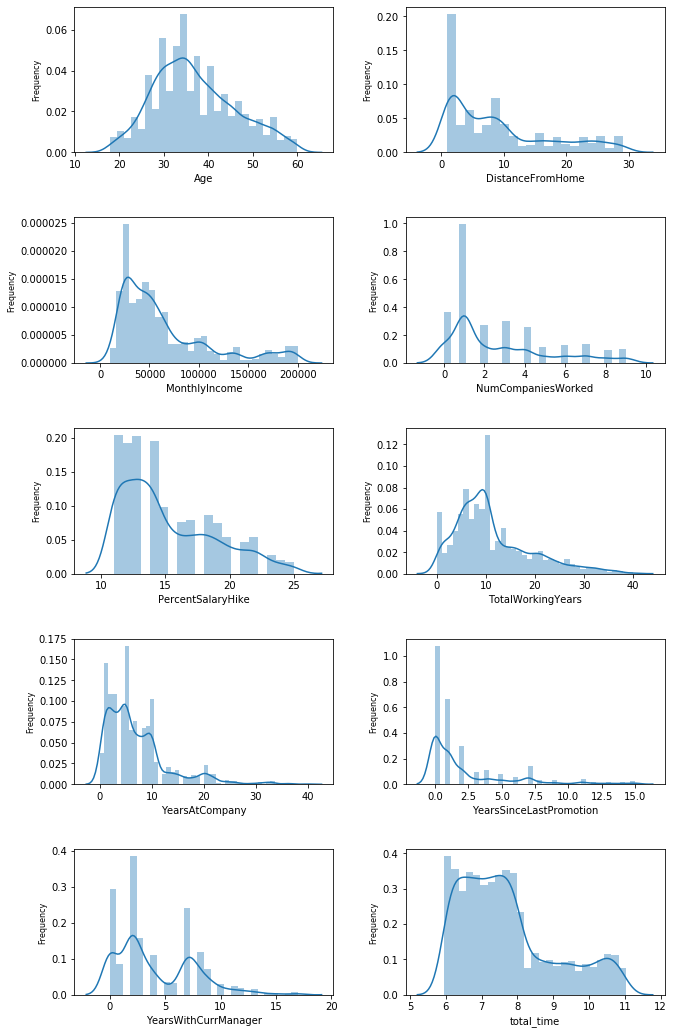

In [52]:
#histograms
col_names_hist = ['Age', 'DistanceFromHome','MonthlyIncome',
                  'NumCompaniesWorked','PercentSalaryHike',
                 'TotalWorkingYears',
                 'YearsAtCompany',
                 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                 'total_time']

fig, ax = plt.subplots(nrows = 5,ncols = 2, figsize=(10,15))
for i, col in enumerate(col_names_hist):
    sns.distplot(master_data[col], hist = True, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_ylabel('Frequency', fontsize=8)
fig.tight_layout(pad =  3.0)
plt.show()

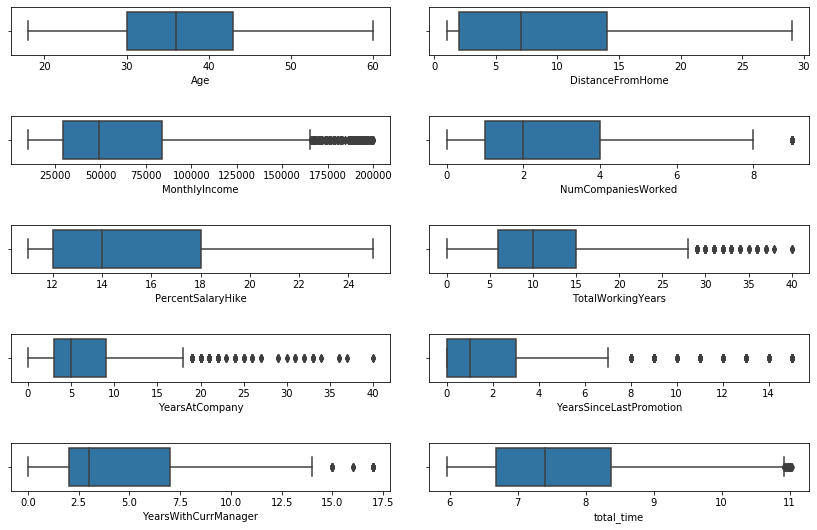

In [53]:
#Boxplots
#fig, ax = plt.subplots(len(col_names_hist), figsize=(12,5))
fig, ax = plt.subplots(nrows = 5, ncols =2, figsize=(12,8))
for i, col in enumerate(col_names_hist):
    sns.boxplot(master_data[col], ax=ax[i//2][i%2])
fig.tight_layout(pad =  3.0)
plt.show()

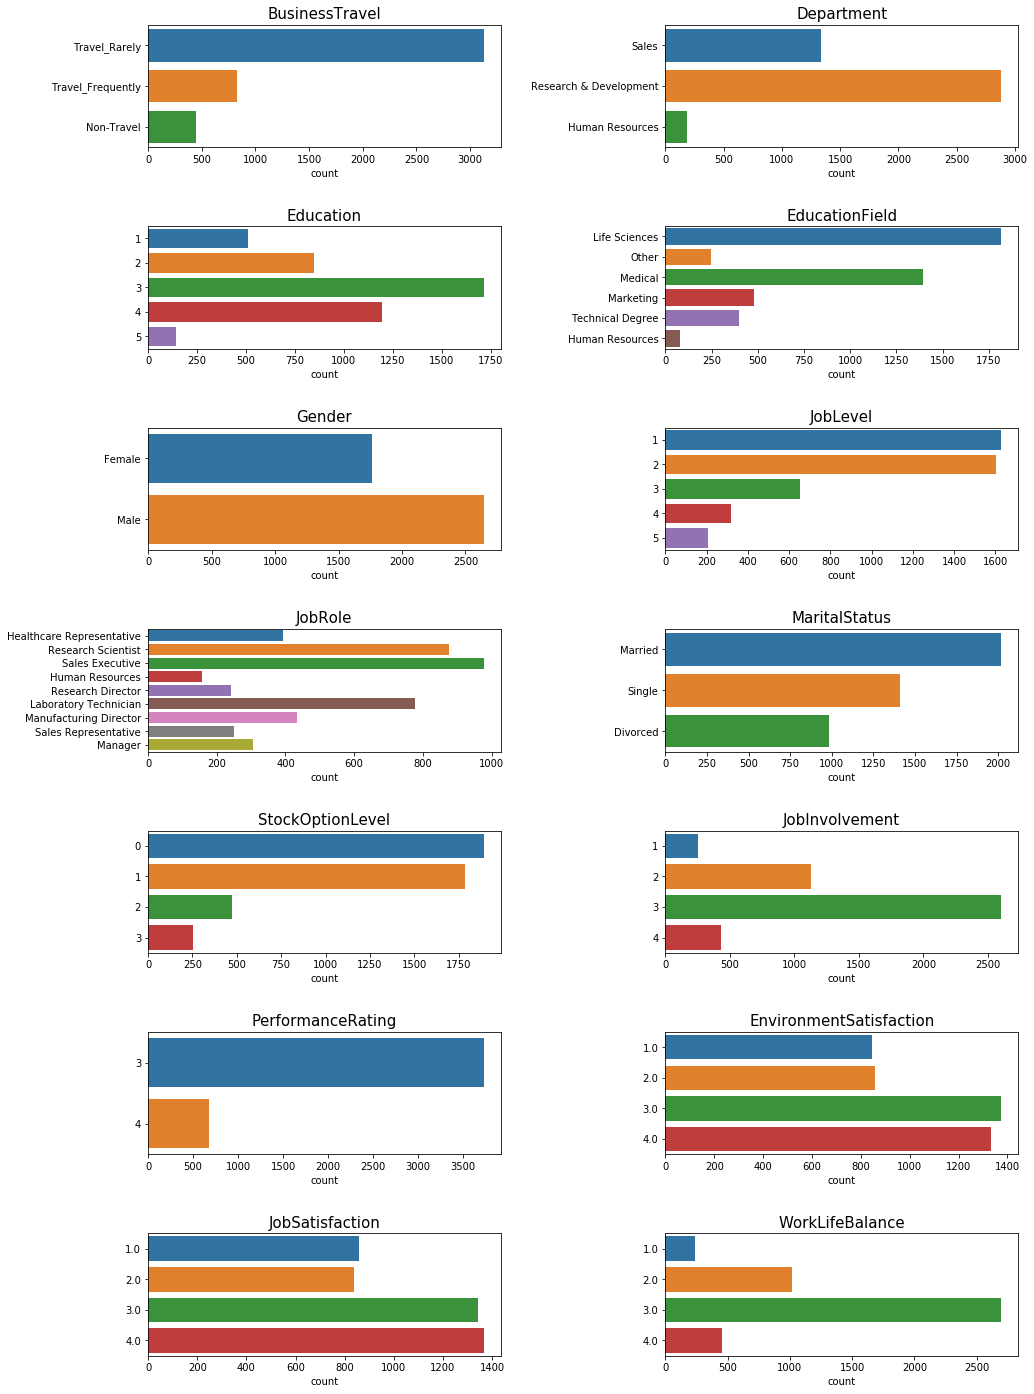

In [54]:
#Barplots
col_names_bar = ['BusinessTravel','Department',
                'Education','EducationField', 'Gender',
                'JobLevel', 'JobRole', 'MaritalStatus',
                'StockOptionLevel',
                'JobInvolvement', 'PerformanceRating','EnvironmentSatisfaction',
                'JobSatisfaction','WorkLifeBalance']

fig_bar, ax = plt.subplots(nrows = 7, ncols=2,  figsize=(15,20))
for i, col in enumerate(col_names_bar):
    sns.countplot(y = master_data[col], ax = ax[i//2][i%2])
    ax[i//2][i%2].set_title(col, fontsize=15)
    ax[i//2][i%2].set_ylabel("", fontsize=15)
fig_bar.tight_layout(pad = 3.0)
plt.show()

In order to understand relation between various variables we will create a correlation matrix

In [98]:
#correlation matrix
corr = master_data.corr()
corr.style.background_gradient(cmap='coolwarm')

### Key observations from the above table and plots: 

**Histograms** <br>
Majority of the variables are right skewed 

**Boxplots** <br>
'MonthlyIncome' has very high number of outliers followed by 'TotalWorkingYears'

**Barplots** <br>
- Proportion of male employees is higher than female employees 
- Majority of the employees are working in Research and Development department 
- In terms of reviews from employees the company mostly gets a rating of 3 or more 

**Correlation plot** <br>
Below variable pairs are highly correlated

- 'PercentSalaryHike' and 'PerformanceRating' 
- 'Age' and 'TotalWorkingYears'  
- 'YearsAtCompany' and 'YearsWithCurrManager' 


### Outlier Analysis

Checking columns containing outliers in the above boxplots

**Z-score Method** <br>
considering a value as an outlier only when zscore > 3

In [56]:
z1 = np.abs(stats.zscore(master_data['MonthlyIncome']))
z2 = np.abs(stats.zscore(master_data['TotalWorkingYears']))
z3 = np.abs(stats.zscore(master_data['NumCompaniesWorked']))
z4 = np.abs(stats.zscore(master_data['YearsAtCompany']))

threshold = 3 

In [57]:
print(np.where(z1 > 3))  #Monthly income #no outliers

(array([], dtype=int64),)


In [58]:
print(np.where(z2 > 3)) #Total working years

(array([  12,  143,  187,  337,  366,  636,  698,  785,  858,  926, 1043,
       1143, 1297, 1310, 1338, 1399, 1482, 1613, 1657, 1807, 1836, 2106,
       2168, 2255, 2328, 2396, 2513, 2613, 2767, 2780, 2808, 2869, 2952,
       3083, 3127, 3277, 3306, 3576, 3638, 3725, 3798, 3866, 3983, 4083,
       4237, 4250, 4278, 4339], dtype=int64),)


In [59]:
# examining outlier values in total working years
master_data.YearsAtCompany.loc[[12,  143,  187,  337,  366,  636,  698,  785,  858,  926, 1043,
       1143, 1297, 1310, 1338, 1399, 1482, 1613, 1657, 1807, 1836, 2106,
       2168, 2255, 2328, 2396, 2513, 2613, 2767, 2780, 2808, 2869, 2952,
       3083, 3127, 3277, 3306, 3576, 3638, 3725, 3798, 3866, 3983, 4083,
       4237, 4250, 4278, 4339]].describe()

count    48.000000
mean     18.375000
std      12.861992
min       5.000000
25%       8.500000
50%      10.000000
75%      32.250000
max      40.000000
Name: YearsAtCompany, dtype: float64

Even though values of 'TotalWorkingyears' are outliers as per Zscore, intuitively they seems alright. 

In [60]:
print(np.where(z3 > 3)) #Number of companies worked #no outliers

(array([], dtype=int64),)


In [61]:
print(np.where(z4 > 3)) #years at company

(array([  12,  153,  167,  215,  219,  303,  334,  337,  395,  419,  491,
        603,  656,  660,  704,  828,  853,  858,  877,  880, 1274, 1310,
       1338, 1402, 1449, 1482, 1623, 1637, 1685, 1689, 1773, 1804, 1807,
       1865, 1889, 1961, 2073, 2126, 2130, 2174, 2298, 2323, 2328, 2347,
       2350, 2744, 2780, 2808, 2872, 2919, 2952, 3093, 3107, 3155, 3159,
       3243, 3274, 3277, 3335, 3359, 3431, 3543, 3596, 3600, 3644, 3768,
       3793, 3798, 3817, 3820, 4214, 4250, 4278, 4342, 4389], dtype=int64),)


In [62]:
# examining outlier values in years at company
master_data.YearsAtCompany.loc[[12,  153,  167,  215,  219,  303,  334,  337,  395,  419,  491,
        603,  656,  660,  704,  828,  853,  858,  877,  880, 1274, 1310,
       1338, 1402, 1449, 1482, 1623, 1637, 1685, 1689, 1773, 1804, 1807,
       1865, 1889, 1961, 2073, 2126, 2130, 2174, 2298, 2323, 2328, 2347,
       2350, 2744, 2780, 2808, 2872, 2919, 2952, 3093, 3107, 3155, 3159,
       3243, 3274, 3277, 3335, 3359, 3431, 3543, 3596, 3600, 3644, 3768,
       3793, 3798, 3817, 3820, 4214, 4250, 4278, 4342, 4389]].describe()

count    75.000000
mean     31.320000
std       3.698648
min      26.000000
25%      29.000000
50%      32.000000
75%      33.000000
max      40.000000
Name: YearsAtCompany, dtype: float64

Even though values of 'YearsAtCompany' are outliers as per Zscore, intuitively they seems alright. 

In [63]:
pd.DataFrame(master_data.nunique(), columns=['# Distinct values'])

# Distinct values
Age                                     43
Attrition                                2
BusinessTravel                           3
Department                               3
DistanceFromHome                        29
Education                                5
EducationField                           6
EmployeeCount                            1
EmployeeID                            4410
Gender                                   2
JobLevel                                 5
JobRole                                  9
MaritalStatus                            3
MonthlyIncome                         1349
NumCompaniesWorked                      10
Over18                                   1
PercentSalaryHike                       15
StandardHours                            1
StockOptionLevel                         4
TotalWorkingYears                       40
TrainingTimesLastYear                    7
YearsAtCompany                          37
YearsSinceLastPromotion                 16
YearsWithCurrManager                    18
total_time                            4410
JobInvolvement                           4
PerformanceRating                        2
EnvironmentSatisfaction                  4
JobSatisfaction                          4
WorkLifeBalance                          4

From above table we observe that below fields have just one unique value and hence they won't provide any distinctive power to the classification 
- Over18
- EmployeeCount
- StandardHours <br>

Also, EmployeeID is an ID field and hence will not be required for the classification

We will remove these columns before modeling 

In [64]:
master_data = master_data.drop(['Over18', 'EmployeeCount',
                                'EmployeeID', 'StandardHours'], axis = 1)
master_data.columns 

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'total_time', 'JobInvolvement',
       'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

Based on the EDA, no abnormalily was observed in the dataset

## Model Building

In [65]:
master_data['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

16% of the observations are our target for the model 

For Modeling we need to convert Categorical variables into dummy variables 

In [66]:
def dummy_func(col_name):
    x = pd.get_dummies(master_data[col_name],drop_first=True, prefix = col_name, prefix_sep="_")
    return x

# The dummy function is creating a dataframe for each of categorical variable 
# with its dummy values in it with name of columns prefixed by the variable name

CBusinessTravel = dummy_func('BusinessTravel')
CDepartment = dummy_func('Department')
CEducationField = dummy_func('EducationField')
CGender = dummy_func('Gender')
CJobRole = dummy_func('JobRole')
CMaritalStatus = dummy_func('MaritalStatus')
CEducation = dummy_func('Education')
CJobLevel = dummy_func('JobLevel')

In [67]:
# We will remove categorical fields from master data and will append dummy variables 
master_data.drop(['BusinessTravel',"Department","EducationField",'Gender','JobRole','MaritalStatus','Education','JobLevel'],axis=1,inplace=True)

master_data = pd.concat([master_data,CBusinessTravel,CDepartment,CEducationField,CGender,CJobRole,CMaritalStatus,CEducation,CJobLevel],axis=1)

master_data.head(3)

Age  Attrition  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0   51          0                 6         131160                 1.0   
1   31          1                10          41890                 0.0   
2   32          0                17         193280                 1.0   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   

   YearsWithCurrManager  total_time  JobInvolvement  PerformanceRating  \
0                     0    7.373651               3                  3   
1                     4    7.718969               2                  4   
2                     3    7.013240               3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0                      3.0              4.0              2.0   
1                      3.0              2.0              4.0   
2                      2.0              2.0              1.0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 1                             0   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                                0            0                        0   
1                                0            0                        0   
2                                0            1                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        0   
1                           1                        0   
2                           0                        1   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      1                     0   
1                             0                      0                     1   
2                             0                      1                     0   

   Education_2  Education_3  Education_4  Education_5  JobLevel_2  JobLevel_3  \
0            1            0            0            0           0           0   
1            0            0            0            0           0           0   
2            0            0            1            0           0           0   

   JobLevel_4  J

In [68]:
master_data.rename(columns = {"Department_Research & Development":"Department_RnD"}, 
                   inplace = True)

For modeling we will split our data into training and test set taking 80-20 split respectively 

In [69]:
#Train-Test(80-20)% sampling
from sklearn.model_selection import train_test_split

x = master_data.drop('Attrition', axis =1)
y = master_data[['Attrition']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y)

In [70]:
y_train['Attrition'].value_counts(), y_test['Attrition'].value_counts() #counts check

(0    2959
 1     569
 Name: Attrition, dtype: int64, 0    740
 1    142
 Name: Attrition, dtype: int64)

### Logistic Regression 
A logistic regression model was applied to the training data with all the variables.

In [71]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(fit_intercept=True, multi_class='auto', solver='lbfgs')
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
#confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# in-sample prediction
y_pred = lgr.predict(X_train)
print(confusion_matrix(y_train, y_pred)) #train data

#out of sample prediction
y_pred_test = lgr.predict(X_test)
print(confusion_matrix(y_test, y_pred_test)) #test data

[[2914   45]
 [ 490   79]]
[[730  10]
 [128  14]]


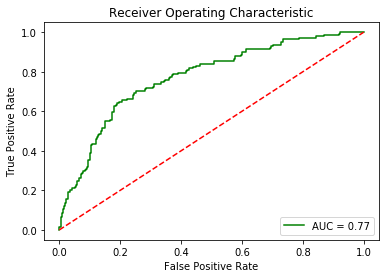

In [74]:
#ROC curve and AUC
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
import matplotlib.pyplot as plt


probs0 = lgr.predict_proba(X_test)
pred0 = probs0[:,1]
fpr0, tpr0, threshold0 = metrics.roc_curve(y_test, pred0)
roc_auc0 = metrics.auc(fpr0, tpr0)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr0, tpr0, 'b', color = 'green', label = 'AUC = %0.2f' % roc_auc0);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
# Model preformance : Logistic Regression
from sklearn.metrics import accuracy_score
print("In-sample Accuracy: " + str(round(accuracy_score(y_train,y_pred),3)))
print("Out of sample Accuracy: " + str(round(accuracy_score(y_test,y_pred_test),3)))

In-sample Accuracy: 0.848
Out of sample Accuracy: 0.844


### Classification Tree
A Classifcation Tree was fitted on the training data with Gini Index as node splitting criteria.  

In [76]:
# classification tree
from sklearn.datasets import load_iris
from sklearn import tree as treee

clf = treee.DecisionTreeClassifier(random_state=21)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=21, splitter='best')

In [77]:
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files (x86)\Graphviz2.38\bin"

C:\Users\hasna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


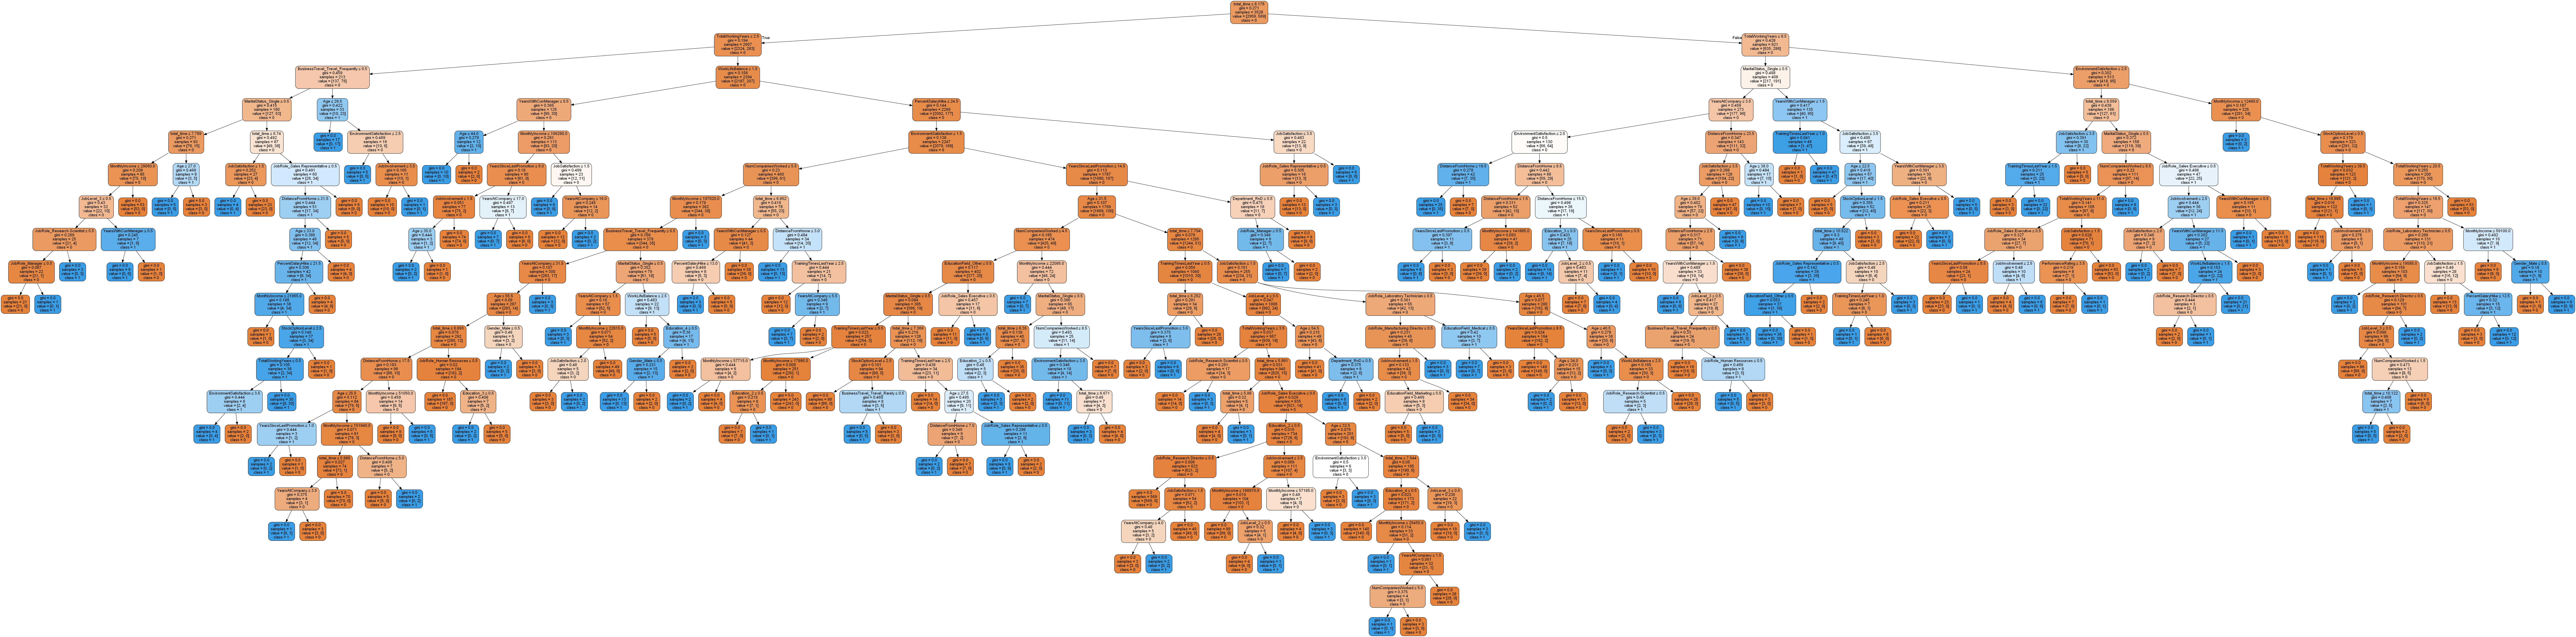

In [78]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('atttree.png')
Image(graph.create_png()) 

In [79]:
y_pred_clf = clf.predict(X_train) #in-sample prediction
print(confusion_matrix(y_train, y_pred_clf))

y_pred_clf_test = clf.predict(X_test) # out-of sample prediction
print(confusion_matrix(y_test, y_pred_clf_test))

[[2959    0]
 [   0  569]]
[[737   3]
 [ 10 132]]


In [80]:
# Model preformance : Classification Tree

print("In-sample Accuracy: " + str(round(accuracy_score(y_train,y_pred_clf),3)))
print("Out of sample Accuracy: " + str(round(accuracy_score(y_test,y_pred_clf_test),3)))

In-sample Accuracy: 1.0
Out of sample Accuracy: 0.985


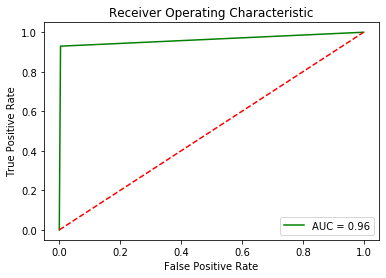

In [81]:
# ROC Curve and AUC
probs1 = clf.predict_proba(X_test)
pred1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, pred1)
roc_auc1 = metrics.auc(fpr1, tpr1)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr1, tpr1, 'b', color = 'green',label = 'AUC = %0.2f' % roc_auc1);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Hyperparameter tuning of the Classification Tree**

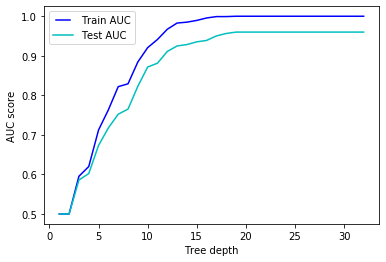

In [82]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix,recall_score

depths = np.linspace(1, 32, 32)
train_results = []
test_results = []

for i in depths:
   tree = treee.DecisionTreeClassifier(max_depth=i,random_state=10)
   tree.fit(X_train, y_train)
   train_pred = tree.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = tree.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(depths, train_results,color='b', label='Train AUC')
line2, = plt.plot(depths, test_results,color='c', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [83]:
int(depths[test_results.index(max(test_results))])

19

Max depth of the tree will be set to 19 as it gives best test AUC of ROC curve.

Now, we will prune the tree setting max_dept to 19.

In [84]:
#pruning the classification tree based on the the above analysis
pruned_clf = treee.DecisionTreeClassifier(max_depth = 19, random_state= 21)
pruned_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=21, splitter='best')

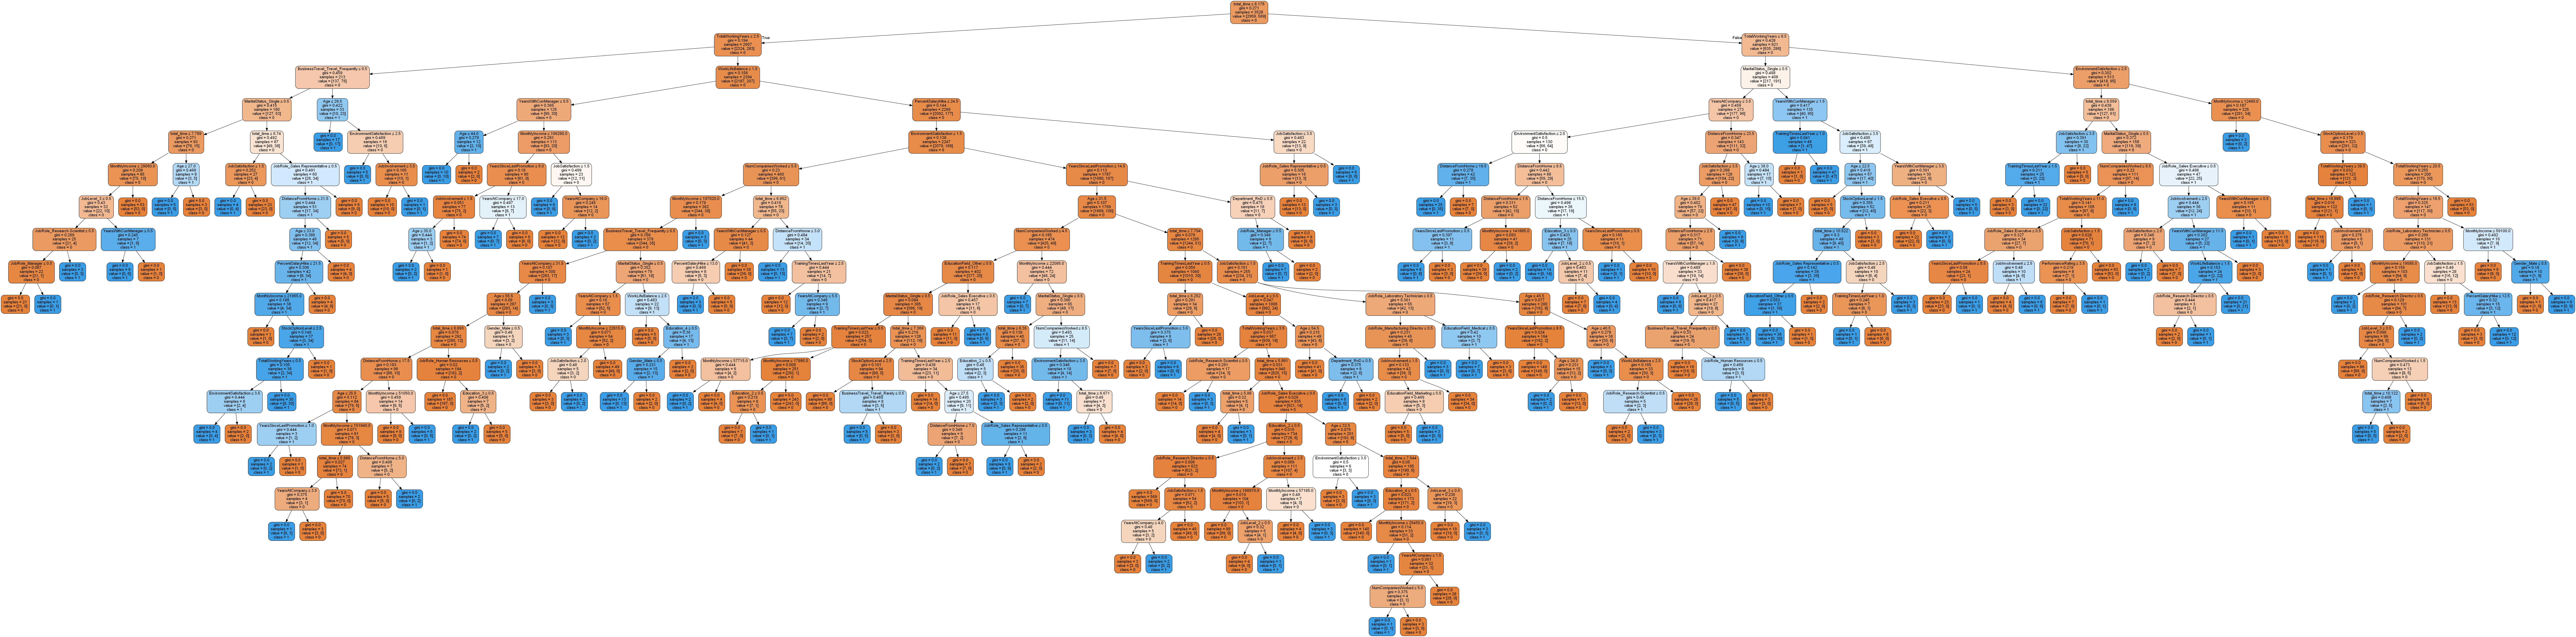

In [85]:
dot_data = StringIO()
export_graphviz(pruned_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('prune_tree.png')
Image(graph.create_png()) 

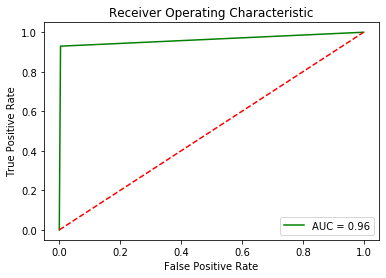

In [86]:
#ROC curve and AUC
probs2 = pruned_clf.predict_proba(X_test)
pred2 = probs1[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, pred2)
roc_auc2 = metrics.auc(fpr2, tpr2)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr2, tpr2, 'b', color = 'green', label = 'AUC = %0.2f' % roc_auc2);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
y_pred_pruned_clf = pruned_clf.predict(X_train) # in sample prediction
print(confusion_matrix(y_train, y_pred_pruned_clf))

y_pred_pruned_clf_test = pruned_clf.predict(X_test) # out of sample prediction
print(confusion_matrix(y_test, y_pred_pruned_clf_test))

[[2959    0]
 [   0  569]]
[[737   3]
 [ 10 132]]


In [88]:
# Model preformance : Classification Tree after pruning

print("In-sample Accuracy: " + str(round(accuracy_score(y_train,y_pred_pruned_clf),3)))
print("Out of sample Accuracy: " + str(round(accuracy_score(y_test,y_pred_pruned_clf_test),3)))

In-sample Accuracy: 1.0
Out of sample Accuracy: 0.985


### Random Forest

In [89]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_depth = 19, random_state=21)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=19, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [90]:
y_pred_rf = rf.predict(X_train) # in sample prediction
print(confusion_matrix(y_train, y_pred_rf))

y_pred_rf_test = rf.predict(X_test) # out of sample prediction
print(confusion_matrix(y_test, y_pred_rf_test))

[[2959    0]
 [   0  569]]
[[740   0]
 [  6 136]]


In [91]:
# Model preformance : Classification Tree after pruning

print("In-sample Accuracy: " + str(round(accuracy_score(y_train,y_pred_rf),3)))
print("Out of sample Accuracy: " + str(round(accuracy_score(y_test,y_pred_rf_test),3)))

In-sample Accuracy: 1.0
Out of sample Accuracy: 0.993


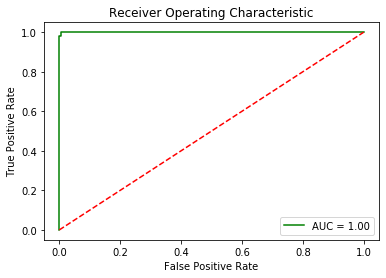

In [92]:
#ROC curve and AUC
probs3 = rf.predict_proba(X_test)
pred3 = probs3[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, pred3)
roc_auc3 = metrics.auc(fpr3, tpr3)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr3, tpr3, 'b', color = 'green', label = 'AUC = %0.2f' % roc_auc3);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Feature Importance Plot

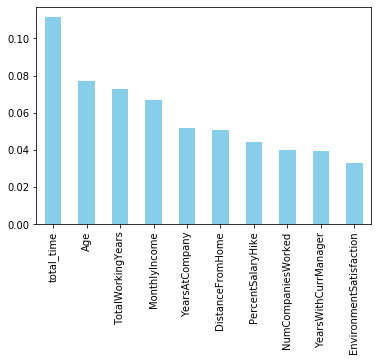

In [93]:
#Feature importance plot
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='bar', color = "skyblue");

The above feature importance plot gives us the top 10 most significant variables for prediction of employee attrition. 

### Support Vector Machine

In [94]:
#SVM
from sklearn.svm import SVC
svm = SVC(gamma='auto', probability = True, random_state=21)
svm.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=21, shrinking=True, tol=0.001,
    verbose=False)

In [95]:
y_pred_svm = svm.predict(X_train) #in sample prediction
print(confusion_matrix(y_train, y_pred_svm))

y_pred_svm_test = svm.predict(X_test) #out of sample prediction
print(confusion_matrix(y_test, y_pred_svm_test))

[[2959    0]
 [   0  569]]
[[740   0]
 [  9 133]]


In [96]:
# Model preformance : SVM

print("In-sample Accuracy: " + str(round(accuracy_score(y_train,y_pred_svm),3)))
print("Out of sample Accuracy: " + str(round(accuracy_score(y_test,y_pred_svm_test),3)))

In-sample Accuracy: 1.0
Out of sample Accuracy: 0.99


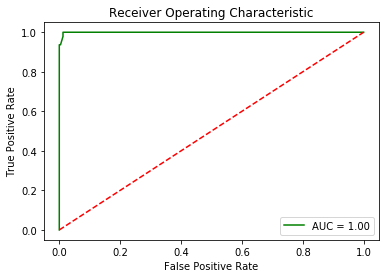

In [97]:
#ROC
#ROC curve and AUC
probs4 = svm.predict_proba(X_test)
pred4 = probs4[:,1]
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, pred4)
roc_auc4 = metrics.auc(fpr4, tpr4)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr4, tpr4, 'b', color = 'green', label = 'AUC = %0.2f' % roc_auc4);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model Summary Table: 

| Model | In Sample Accuracy | Out of Sample Accuracy | AUC of ROC Curve |
|------|------|------|------|
|   Logistic Regression  | 0.848 | 0.844 | 0.77 |
|   Classification Tree  | 1.000 | 0.985 | 0.96 |
|   **Random Forest**  | **1.000** | **0.993** | **1.00** |
|   Support Vector Machine  | 1.000 | 0.990 | 1.00 |

**It is evident from the summary table that Random Forest is the best performing model. We recommend it for Employee Atrrition predictions.**


### Conclusion

After data analysis of the Employee Attrition datasets, it was observed that 'Total time spent in the office', 'age', 'total working years', 'years at company', 'monthly salary', 'distance from home', 'percent salary hike', 'number of companies worked at' and 'environment satisfaction' are the key parameters that decide whether an employee will leave the company.